In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Audio

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
from path import Path as path

In [4]:
PATH = path("data/planet")

In [7]:
PATH.files()

[Path('data/planet/test_v2_file_mapping.csv'),
 Path('data/planet/train_v2.csv')]

In [9]:
PATH.dirs()

[Path('data/planet/train-jpg'),
 Path('data/planet/test-jpg-additional'),
 Path('data/planet/models'),
 Path('data/planet/test-jpg'),
 Path('data/planet/tmp')]

In [5]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [6]:
label_csv = PATH + "/train_v2.csv"
labels = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(labels)

In [7]:
def get_data(sz, myzoom = 1.05, mytransform = transforms_top_down):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=myzoom)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                                       suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [14]:
data = get_data(256)

In [16]:
x,y = next(iter(data.val_dl))

In [17]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [18]:
y[0]


 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0
 1
[torch.cuda.FloatTensor of size 17 (GPU 0)]

In [19]:
len(y[0])

17

In [20]:
len(data.classes)

17

In [22]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

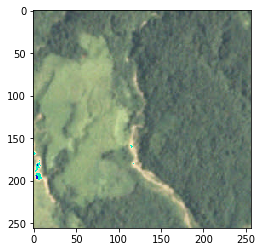

In [29]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.7)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.204435   0.223488   0.837733  



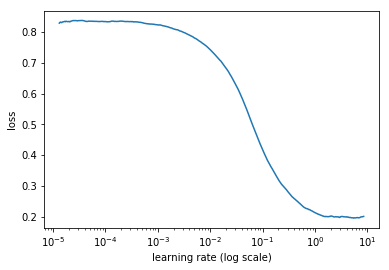

In [18]:
#Setting Parameters:
sz = 128
resize = 1.3
zoom = 1.3
data = get_data(sz, myzoom = zoom)
data = data.resize(int(sz*resize), 'tmp')
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
lrf = learn.lr_find()
learn.sched.plot()
Audio(url="CHORD.WAV", autoplay=True)

In [19]:
lr = 1.0/3

In [20]:
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.135776   0.120972   0.895814  
    1      0.131049   0.116975   0.900478                    
    2      0.129754   0.114528   0.902253                    
    3      0.129799   0.113549   0.903195                    
    4      0.126706   0.112029   0.903625                    
    5      0.124379   0.111126   0.905412                    
    6      0.123355   0.110346   0.906184                    



In [21]:
lrs = np.array([lr/9, lr/3, lr])

In [22]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.114567   0.099896   0.914456  
    1      0.111108   0.101054   0.91382                     
    2      0.106342   0.092895   0.920817                     
    3      0.104745   0.094317   0.921528                    
    4      0.103501   0.093558   0.921426                     
    5      0.095343   0.089557   0.923828                     
    6      0.091697   0.089083   0.924516                     



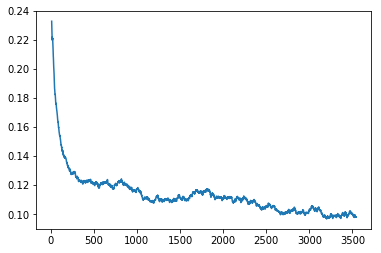

In [42]:
learn.sched.plot_loss()

In [23]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)
Audio(url="CHORD.WAV", autoplay=True)

In [ ]:
f2(preds, y)